In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/survey-results-public.csv')
df.shape

(51392, 154)

In [3]:
takeaway2 = df[list(df.columns[df.columns.to_series().str.contains('ImportantHiring')]) + ['Salary']]

In [4]:
takeaway2 = takeaway2.dropna(subset=['Salary'])

In [5]:
takeaway2 = takeaway2.dropna(subset=list(df.columns[df.columns.to_series().str.contains('ImportantHiring')]), how='any')

In [6]:
takeaway2.shape

(8320, 11)

In [7]:
options = dict(zip(['Very important', 'Important', 'Somewhat important', 'Not very important', 'Not at all important'], [10,7,5,3,0]))
for k,v in options.items():
    takeaway2 = takeaway2.replace(k,v)

In [8]:
takeaway2['count'] = [1] * takeaway2.shape[0]
takeaway2 = takeaway2.groupby(pd.cut(takeaway2["Salary"], np.arange(0, 1.0+200000, 10000))).sum()

<AxesSubplot:xlabel='Salary'>

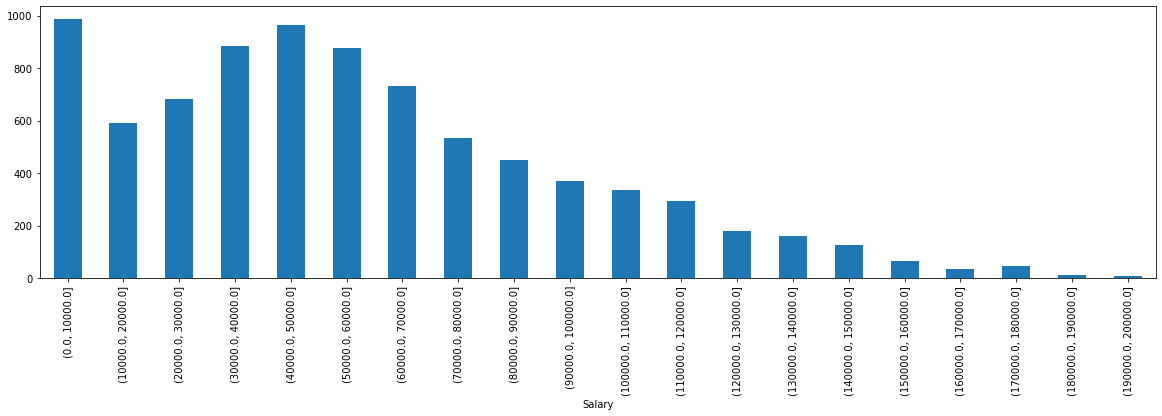

In [9]:
takeaway2['count'].plot(figsize=[20,5], kind='bar')

In [10]:
takeaway2 = takeaway2.iloc[:,1:].div(takeaway2['count'], axis=0).drop(['Salary', 'count'], axis=1)

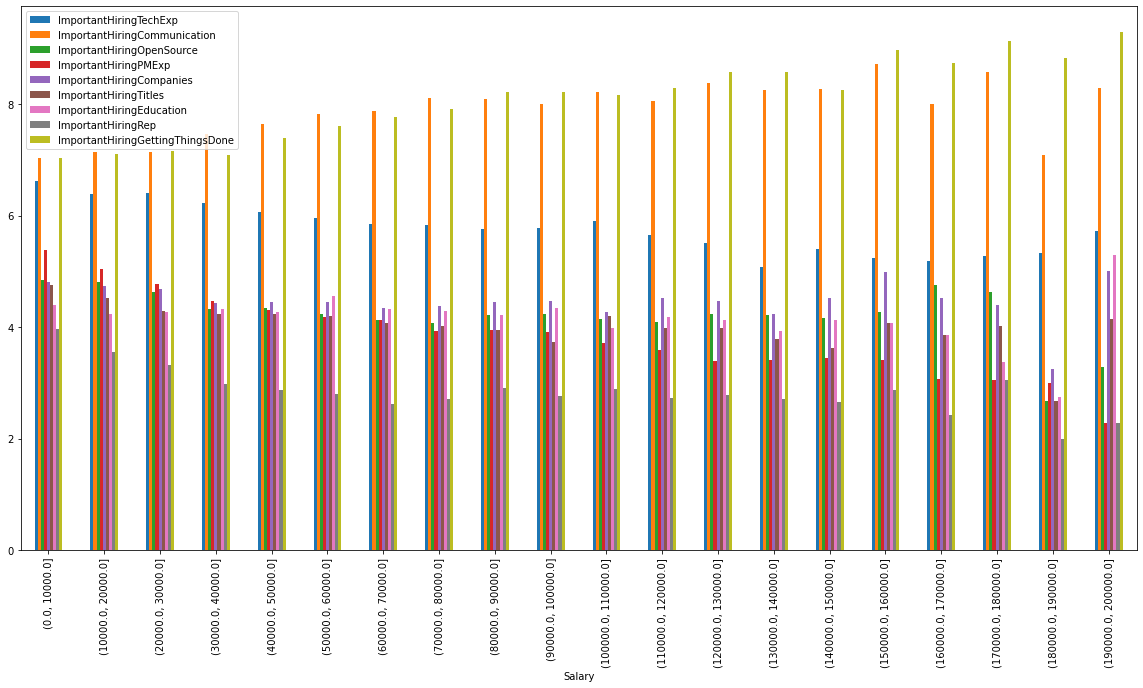

In [11]:
takeaway2.plot(figsize=[20,10], kind='bar');